Importing the libraries

In [63]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from nsepy import get_history
from datetime import date
import copy

In [42]:
ALPHAVANTAGE_API_KEY = 'TBWN7EF5RQZXTIWU' #required api key

In [9]:
start_date = date(2018, 3, 27)
end_date = date(2021, 3, 6)

Importing the top 50 companies csv file

In [10]:
df = pd.read_csv("index_stocks.csv")

In [11]:
cols = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
df.drop(df.columns[cols],axis=1,inplace=True)

In [12]:
df

,Company Name,Company Ticker,Security Code,Investibility weighting factor,Total Shares,Market Cap,Average Dividends,Book Value percentage,Sales percentage,Cash flow percentage,Dividend percentage,RAFI Fundamental Value,Rafi adjustment factor Ci,Investible Rafi fundamental Value,Company value
0,Total,NaN,0,52.5519,8.240710e+11,NaN,146214.7445,100.00%,1.000000,1.000000,1.000000,1.005173e+07,229876.912000,5.042277e+06,5.031550e+13
1,AXIS BANK LTD,AXISBANK,532215,0.8610,3.064713e+09,2.274017e+05,521.3700,2.06%,0.009942,0.132915,0.003566,4.176547e+05,1.836638,3.596007e+05,3.596010e+12
2,RELIANCE INDUSTRIES LTD,RELIANCE,500325,0.4926,6.585844e+09,1.449215e+06,3553.0620,0.146640081,0.083774,0.033721,0.024300,7.210869e+05,0.497571,3.552074e+05,3.552070e+12
3,HDFC BANK LTD,HDFCBANK,500180,0.7400,5.510632e+09,8.398755e+05,2779.3700,0.042167432,0.017649,0.111460,0.019009,4.757141e+05,0.566410,3.520284e+05,3.520280e+12
4,ICICI BANK LTD,ICICIBANK,532174,0.5254,6.913848e+09,4.185298e+05,1188.4120,0.029393182,0.013331,0.173907,0.008128,5.618988e+05,1.342554,2.952216e+05,2.952220e+12
5,KOTAK MAHINDRA BANK LTD,KOTAKBANK,500247,0.7397,1.981946e+09,3.765698e+05,94.1340,0.016048792,0.005155,0.123957,0.000644,3.645102e+05,0.967975,2.696282e+05,2.696280e+12
6,STATE BANK OF INDIA,SBIN,500112,0.4216,8.917687e+09,3.473439e+05,829.6880,0.060016528,0.047288,0.142727,0.005674,6.392651e+05,1.840439,2.695142e+05,2.695140e+12
7,INDIAN OIL CORPORATION LTD,IOC,530965,0.4839,2.053500e+11,5.361679e+05,8937.0900,0.017650922,0.083925,0.001786,0.061123,4.112133e+05,0.766949,1.989861e+05,1.989860e+12
8,ITC LTD,ITC,500875,0.8669,1.230491e+10,2.568034e+05,7699.4320,0.014123941,0.008770,0.001470,0.052658,1.925544e+05,0.749812,1.669254e+05,1.669250e+12
9,OIL AND NATURAL GAS CORPORATION LTD,ONGC,500312,0.3959,1.256989e+10,1.495816e+05,8112.4560,0.050199597,0.060823,0.001682,0.055483,4.204711e+05,2.810981,1.664645e+05,1.664650e+12


In [13]:
df_fix = df.copy(deep=False)

In [26]:
n = 715
prices = [0]*n

In [15]:
df_fix

,Company Name,Company Ticker,Security Code,Investibility weighting factor,Total Shares,Market Cap,Average Dividends,Book Value percentage,Sales percentage,Cash flow percentage,Dividend percentage,RAFI Fundamental Value,Rafi adjustment factor Ci,Investible Rafi fundamental Value,Company value
0,Total,NaN,0,52.5519,8.240710e+11,NaN,146214.7445,100.00%,1.000000,1.000000,1.000000,1.005173e+07,229876.912000,5.042277e+06,5.031550e+13
1,AXIS BANK LTD,AXISBANK,532215,0.8610,3.064713e+09,2.274017e+05,521.3700,2.06%,0.009942,0.132915,0.003566,4.176547e+05,1.836638,3.596007e+05,3.596010e+12
2,RELIANCE INDUSTRIES LTD,RELIANCE,500325,0.4926,6.585844e+09,1.449215e+06,3553.0620,0.146640081,0.083774,0.033721,0.024300,7.210869e+05,0.497571,3.552074e+05,3.552070e+12
3,HDFC BANK LTD,HDFCBANK,500180,0.7400,5.510632e+09,8.398755e+05,2779.3700,0.042167432,0.017649,0.111460,0.019009,4.757141e+05,0.566410,3.520284e+05,3.520280e+12
4,ICICI BANK LTD,ICICIBANK,532174,0.5254,6.913848e+09,4.185298e+05,1188.4120,0.029393182,0.013331,0.173907,0.008128,5.618988e+05,1.342554,2.952216e+05,2.952220e+12
5,KOTAK MAHINDRA BANK LTD,KOTAKBANK,500247,0.7397,1.981946e+09,3.765698e+05,94.1340,0.016048792,0.005155,0.123957,0.000644,3.645102e+05,0.967975,2.696282e+05,2.696280e+12
6,STATE BANK OF INDIA,SBIN,500112,0.4216,8.917687e+09,3.473439e+05,829.6880,0.060016528,0.047288,0.142727,0.005674,6.392651e+05,1.840439,2.695142e+05,2.695140e+12
7,INDIAN OIL CORPORATION LTD,IOC,530965,0.4839,2.053500e+11,5.361679e+05,8937.0900,0.017650922,0.083925,0.001786,0.061123,4.112133e+05,0.766949,1.989861e+05,1.989860e+12
8,ITC LTD,ITC,500875,0.8669,1.230491e+10,2.568034e+05,7699.4320,0.014123941,0.008770,0.001470,0.052658,1.925544e+05,0.749812,1.669254e+05,1.669250e+12
9,OIL AND NATURAL GAS CORPORATION LTD,ONGC,500312,0.3959,1.256989e+10,1.495816e+05,8112.4560,0.050199597,0.060823,0.001682,0.055483,4.204711e+05,2.810981,1.664645e+05,1.664650e+12


In [27]:
for i in range(1, 5):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

AXISBANK
RELIANCE unsafe
HDFCBANK
ICICIBANK


In [28]:
for i in range(5, 9):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

KOTAKBANK
SBIN
IOC
ITC


In [29]:
for i in range(9, 13):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

ONGC
LT
INFY unsafe
HINDALCO


In [30]:
for i in range(13, 17):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

TCS
TATAMOTORS
BPCL
NTPC


In [31]:
for i in range(17, 20):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

COALINDIA
VEDL unsafe
TATASTEEL unsafe


In [32]:
for i in range(20, 23):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

HINDPETRO
M&M unsafe
BHARTIARTL


In [33]:
ticker = "BSE:"+df_fix.loc[23, "Security Code"].astype(str)
try:
    stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
    print(df.loc[23, "Company Ticker"])
except ValueError as ve:
    ticker = "BSE:"+df_fix.loc[23, "Company Ticker"]
    stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
    print(df.loc[i, "Company Ticker"], "unsafe")
finally:
    for j in range(n):
        prices[j]+=stocks['close'][j]*df_fix.loc[23, "Total Shares"]

POWERGRID


In [34]:
for i in range(24, 27):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

INDUSINDBK
HINDUNILVR
GRASIM


In [35]:
for i in range(27, 30):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

JSWSTEEL
GAIL
HCLTECH


In [36]:
for i in range(30, 33):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

MARUTI
UPL unsafe
TECHM


In [37]:
for i in range(33, 36):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

PNB
RECLTD
HEROMOTOCO unsafe


In [38]:
for i in range(36, 39):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

YESBANK
BANDHANBNK
BAJAJ-AUTO unsafe


In [39]:
for i in range(39, 42):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

PFC
PEL unsafe
ADANIPORTS


In [40]:
for i in range(42, 45):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

MOTHERSUMI
PETRONET
AUBANK


In [50]:
for i in range(45, 47):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

SUNPHARMA
ACC


In [52]:
for i in range(47, 49):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

ULTRACEMCO unsafe
AMBUJACEM


In [53]:
for i in range(49, 51):
    ticker = "BSE:"+df_fix.loc[i, "Security Code"].astype(str)
    try:
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"])
    except ValueError as ve:
        ticker = "BSE:"+df_fix.loc[i, "Company Ticker"]
        stocks = web.DataReader(ticker, "av-daily", start=start_date, end=date(2021, 3, 6), api_key=ALPHAVANTAGE_API_KEY)
        print(df.loc[i, "Company Ticker"], "unsafe")
    finally:
        for j in range(n):
            prices[j]+=stocks['close'][j]*df_fix.loc[i, "Total Shares"]

CIPLA
WIPRO


In [54]:
len(prices)

715

In [55]:
date_index = pd.DataFrame()
date_index["Index"] = stocks.index
date_index = date_index.drop(date_index.index[[0,1,2,3,4,5,6,7,8,9,10]])
date_index

,Index
11,2018-04-13
12,2018-04-16
13,2018-04-17
14,2018-04-18
15,2018-04-19
...,...
721,2021-03-01
722,2021-03-02
723,2021-03-03
724,2021-03-04


In [56]:
prices

[487419962204499.06,
 481099854805622.44,
 481910908066794.44,
 483835568675272.56,
 476813002539344.94,
 486097729629711.2,
 481353887094339.56,
 476924935762347.75,
 478287057907038.44,
 479635349161312.8,
 491149624732399.7,
 492789335285894.7,
 481757994885774.7,
 479875910154187.4,
 479663449469687.4,
 482391374617665.9,
 496429332270983.9,
 498149862758203.8,
 489373522187233.2,
 490136582472026.1,
 495696888005420.8,
 499459734387723.44,
 504614105509350.1,
 502278669618832.1,
 497339495548807.3,
 493721891324030.7,
 498407780619589.44,
 493058563234049.06,
 495202326155935.75,
 493927139415736.06,
 499238897342529.75,
 501357853378104.2,
 501789410359863.56,
 500230800553220.25,
 497884652653825.06,
 496065442495473.8,
 495030840593848.56,
 498145658974188.5,
 492050352829959.1,
 503825338433005.44,
 508573652549696.75,
 506507288960042.9,
 507027138188233.2,
 506031478563644.3,
 512851114678538.3,
 508658622126178.6,
 513876351106113.0,
 507905195303900.8,
 513369345548218.5,


In [ ]:
prices.index(574969699090600.8)
temp = prices[110]
y_val = copy.deepcopy(prices)
for i in range(110, len(y_val)):
    y_val[i]+=prices[109]-prices[110]

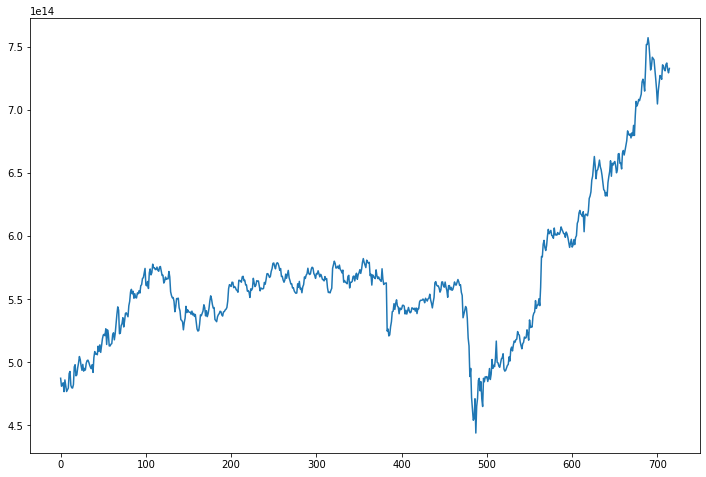

In [67]:
plt.figure(figsize=(12,8))
plt.plot(y_val)